In [1]:
import numpy as np # linear algebra
import pandas as pd
import re
import seaborn as sns

from plotly import tools
import plotly.offline as py
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import folium 
from folium import plugins

from nltk.stem.porter import PorterStemmer

from nltk.corpus import stopwords
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

import string

from matplotlib import pyplot as plt

from wordcloud import WordCloud

In [2]:
#nltk.download('stopwords')

In [3]:
df_train = pd.read_csv('nlp-getting-started/train.csv', dtype={'id': np.int16, 'target': np.int8})
df_test = pd.read_csv('nlp-getting-started/test.csv', dtype={'id': np.int16})

# word_count
df_train['word_count'] = df_train['text'].apply(lambda x: len(str(x).split()))
df_test['word_count'] = df_test['text'].apply(lambda x: len(str(x).split()))

# unique_word_count
df_train['unique_word_count'] = df_train['text'].apply(lambda x: len(set(str(x).split())))
df_test['unique_word_count'] = df_test['text'].apply(lambda x: len(set(str(x).split())))

# url_count
df_train['url_count'] = df_train['text'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))
df_test['url_count'] = df_test['text'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))

# mean_word_length
df_train['mean_word_length'] = df_train['text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
df_test['mean_word_length'] = df_test['text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

# char_count
df_train['char_count'] = df_train['text'].apply(lambda x: len(str(x)))
df_test['char_count'] = df_test['text'].apply(lambda x: len(str(x)))
# punctuation_count
df_train['punctuation_count'] = df_train['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
df_test['punctuation_count'] = df_test['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

# hashtag_count
df_train['hashtag_count'] = df_train['text'].apply(lambda x: len([c for c in str(x) if c == '#']))
df_test['hashtag_count'] = df_test['text'].apply(lambda x: len([c for c in str(x) if c == '#']))

# mention_count
df_train['mention_count'] = df_train['text'].apply(lambda x: len([c for c in str(x) if c == '@']))
df_test['mention_count'] = df_test['text'].apply(lambda x: len([c for c in str(x) if c == '@']))


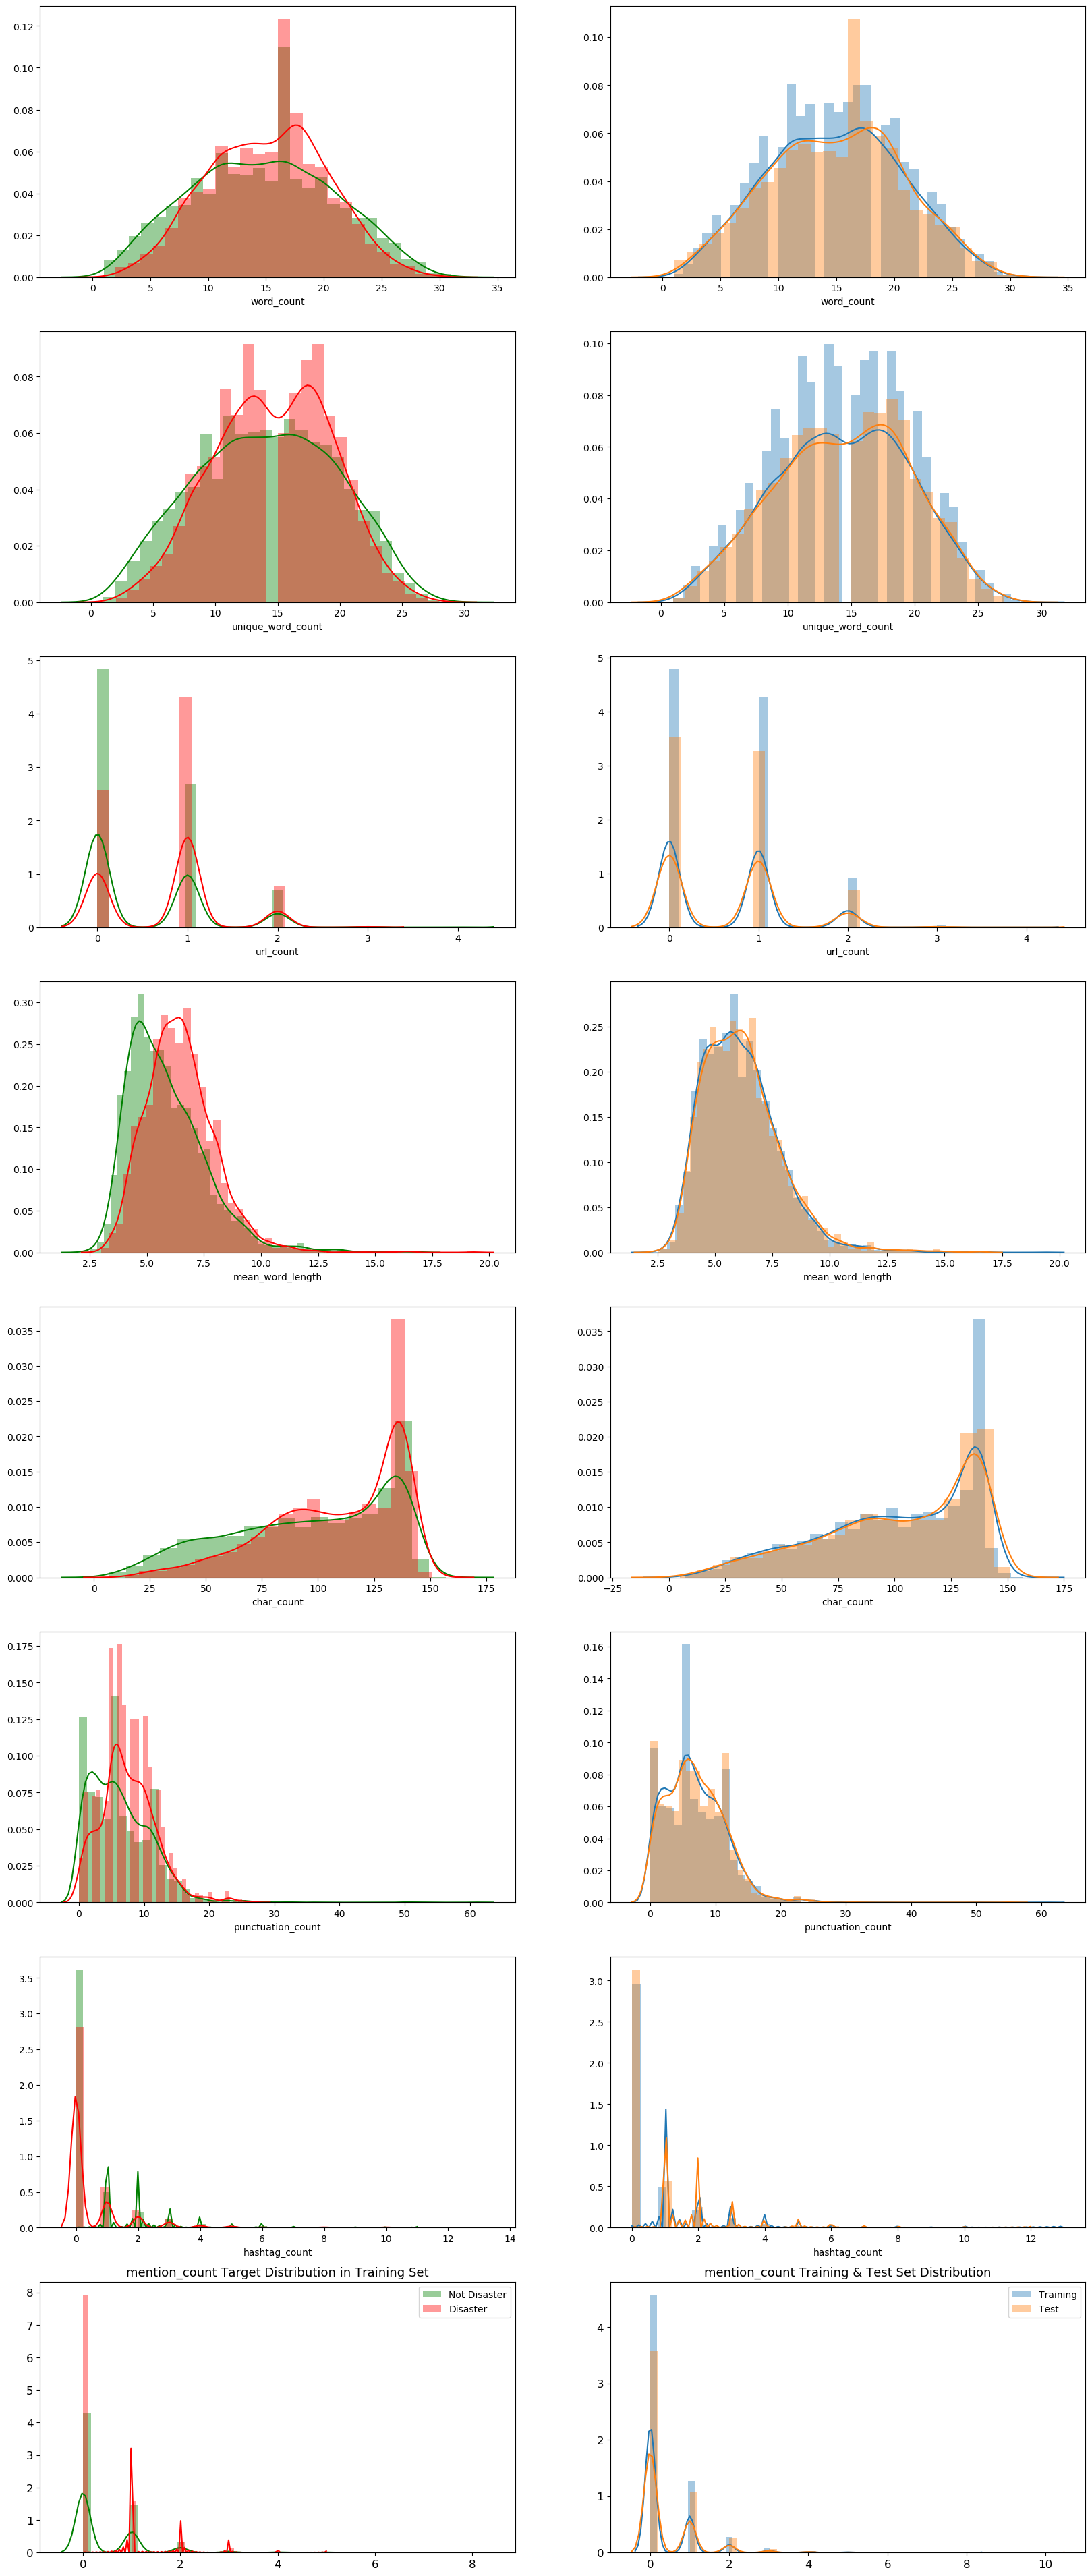

In [4]:
METAFEATURES = ['word_count', 'unique_word_count', 'url_count', 'mean_word_length',
                'char_count', 'punctuation_count', 'hashtag_count', 'mention_count']
DISASTER_TWEETS = df_train['target'] == 1

fig, axes = plt.subplots(ncols=2, nrows=len(METAFEATURES), figsize=(20, 50), dpi=100)
for i, feature in enumerate(METAFEATURES):
    sns.distplot(df_train.loc[~DISASTER_TWEETS][feature], label='Not Disaster', ax=axes[i][0], color='green')
    sns.distplot(df_train.loc[DISASTER_TWEETS][feature], label='Disaster', ax=axes[i][0], color='red')
    sns.distplot(df_train[feature], label='Training', ax=axes[i][1])
    sns.distplot(df_test[feature], label='Test', ax=axes[i][1])

for j in range(2):
    axes[i][j].set_xlabel('')
    axes[i][j].tick_params(axis='x', labelsize=12)
    axes[i][j].tick_params(axis='y', labelsize=12)
    axes[i][j].legend()

    axes[i][0].set_title(f'{feature} Target Distribution in Training Set', fontsize=13)
    axes[i][1].set_title(f'{feature} Training & Test Set Distribution', fontsize=13)

plt.show()

In [5]:
ds_train = pd.read_csv('nlp-getting-started/train.csv')
ds_test = pd.read_csv('nlp-getting-started/test.csv')
sub = pd.read_csv('nlp-getting-started/sample_submission.csv')

In [6]:
print("Number of records in Train data set",len(ds_train.index))

Number of records in Train data set 7613


In [7]:
bool_series_location = pd.isnull(ds_train['location'])

# filtering data
# displaying data only with location = NaN
ds_train[bool_series_location]
print("Number of records with missing location",len(ds_train[bool_series_location]))
print('{}% of Kewords are missing from Total Number of Records'.format((len(ds_train[bool_series_location])/len(ds_train.index))*100))

Number of records with missing location 2533
33.27203467752528% of Kewords are missing from Total Number of Records


In [8]:
bool_series_keyword = pd.isnull(ds_train['keyword'])
print("Number of records with missing keywords",len(ds_train[bool_series_keyword]))
print('{}% of Kewords are missing from Total Number of Records'.format((len(ds_train[bool_series_keyword])/len(ds_train.index))*100))

Number of records with missing keywords 61
0.8012610009194797% of Kewords are missing from Total Number of Records


52


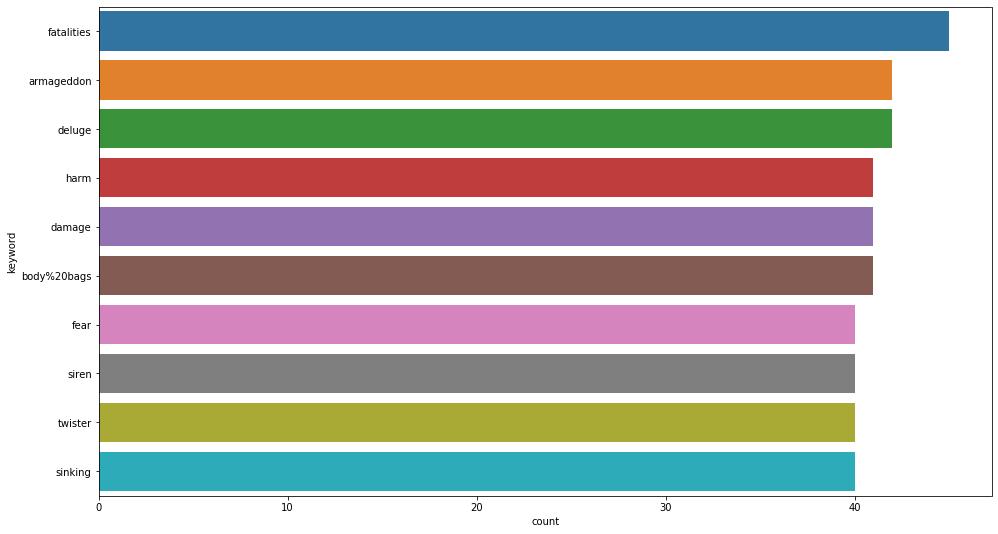

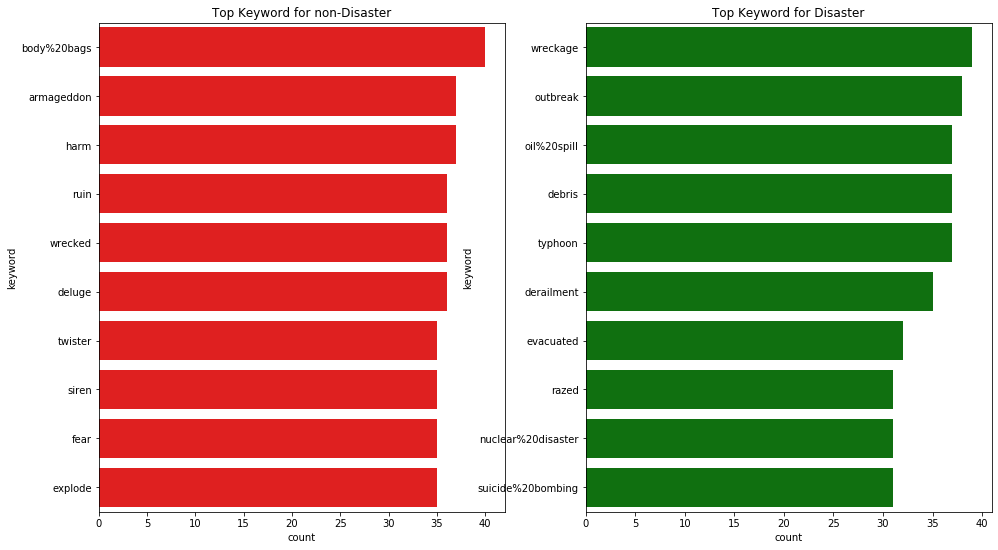

In [9]:
trainDf = ds_train.set_index('id')
print(trainDf.duplicated().sum())
trainDf.drop_duplicates(inplace=True)
vctrain =  trainDf.keyword.value_counts()
plt.figure(figsize=(16,9))
sns.countplot(y=trainDf.keyword, order=vctrain.iloc[:10].index)
plt.figure(figsize=(16,9))
sns.countplot(y=trainDf.keyword, order=vctrain.iloc[:10].index)
plt.subplot(121)
sns.countplot(y=trainDf.keyword[trainDf.target == 0], order= trainDf.keyword[trainDf.target == 0].value_counts().iloc[:10].index, color='r')
plt.title('Top Keyword for non-Disaster')
plt.subplot(122)
sns.countplot(y=trainDf.keyword[trainDf.target == 1], order= trainDf.keyword[trainDf.target == 1].value_counts().iloc[:10].index, color='g')
plt.title('Top Keyword for Disaster')
plt.show()

In [10]:
ds_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [11]:
ds_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [12]:
cnt_srs = ds_train['target'].value_counts()
## target distribution ##
colors = ['#FEBFB3', '#E1396C', '#96D38C', '#D0F9B1']
labels = (np.array(cnt_srs.index))
sizes = (np.array((cnt_srs / cnt_srs.sum())*100))

trace = go.Pie(labels=labels, values=sizes, marker=dict(colors=colors, line=dict(color='#000000', width=2)))
layout = go.Layout(
    title='Target distribution',
    font=dict(size=18),
    width=600,
    height=600,
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="usertype")

In [13]:
cnt_ = ds_train['location'].value_counts()
cnt_.reset_index()
cnt_ = cnt_[:30,]
trace1 = go.Bar(
                x = cnt_.index,
                y = cnt_.values,
                name = "Number of tweets in dataset according to location",
                marker = dict(color = 'rgba(100, 100, 145, 0.5)',
                             line=dict(color='rgb(220,0,0)',width=1.5)),
                )

data = [trace1]
layout = go.Layout(barmode = "group",title = 'Number of tweets in dataset according to location')
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

In [14]:
df = ds_train['location'].value_counts()[:20,]
df = pd.DataFrame(df)
df = df.reset_index()
df.columns = ['location', 'counts'] 
geolocator = Nominatim(user_agent="specify_your_app_name_here")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
dictt_latitude = {}
dictt_longitude = {}
for i in df['location'].values:
    print(i)
    location = geocode(i)
    dictt_latitude[i] = location.latitude
    dictt_longitude[i] = location.longitude
df['latitude']= df['location'].map(dictt_latitude)
df['longitude'] = df['location'].map(dictt_longitude)

USA
New York
United States
London
Canada
Nigeria
UK
Los Angeles, CA
India
Mumbai
Washington, DC
Kenya
Worldwide
Australia
Chicago, IL
California
New York, NY
Everywhere
California, USA
San Francisco


In [15]:
map1 = folium.Map(location=[10.0, 10.0], tiles='CartoDB dark_matter', zoom_start=2.3)
markers = []
for i, row in df.iterrows():
    loss = row['counts']
    if row['counts'] > 0:
        count = row['counts']*0.4
    folium.CircleMarker([float(row['latitude']), float(row['longitude'])], radius=float(count), color='#ef4f61', fill=True).add_to(map1)
map1

In [16]:
#dropping missing 'keyword' records from train data set
ds_train=ds_train.drop(ds_train[bool_series_keyword].index,axis=0)
#Resetting the index after droping the missing records
ds_train=ds_train.reset_index(drop=True)
print("Number of records after removing missing keywords",len(ds_train))
ds_train.head()

Number of records after removing missing keywords 7552


,id,keyword,location,text,target
0,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1
1,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0
2,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1
3,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0
4,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0


In [17]:
ds_train=ds_train.drop(['location'],axis=1)

In [18]:
def cleantxt(data,column):
    pstem = PorterStemmer()
    for i in range(data[column].shape[0]):
        #Removing urls
        text = re.sub(r'(https?|ftp|file)://t.co.*', ' ', ds_train[column][i])
        #Removing HTML tags
        text = re.sub(r'<.*?>', ' ', text)
        #Removing Emojis
        text = re.sub("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", ' ', text)
        #Removing punctuations
        text = re.sub(r'[?|!|\'|"|#]',r'',text)
        text = re.sub(r'[.|,|)|(|)|\|/]',r' ',text) 
        #Remove unwanted words
        text = re.sub("[^a-zA-Z]", ' ', text)
        #Transform words to lowercase
        text = text.lower()
        text = text.split()
        #Remove stopwords then Stemming it
        text = [pstem.stem(word) for word in text if not word in set(stopwords.words('english'))]
        text = ' '.join(text)
        data['text'][i] = text

    print("successfully") 

cleantxt(ds_train,'text')
cleantxt(ds_test,'text')

successfully
successfully


In [19]:
print(ds_train['text'])

0                            bbcmtd wholesal market ablaz
1                          alway tri bring heavi metal rt
2        africanbaz break news nigeria flag set ablaz aba
3                                           cri set ablaz
4                      plu side look sky last night ablaz
                              ...                        
7547                            jt ruff cameronhack wreck
7548    three day work theyv pretti much wreck hahaha ...
7549    fx forex trade cramer iger word wreck disney s...
7550    enginesh great atmospher british lion gig toni...
7551             cramer iger word wreck disney stock cnbc
Name: text, Length: 7552, dtype: object


In [20]:
def create_corpus_df(ds_train, target):
    corpus=[]
    
    for x in ds_train[ds_train['target']==target]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

In [21]:
#Real Disaster
corpus_real=create_corpus_df(ds_train,1)
len(corpus_real)

corpus_real[:10]

['bbcmtd',
 'wholesal',
 'market',
 'ablaz',
 'africanbaz',
 'break',
 'news',
 'nigeria',
 'flag',
 'set']

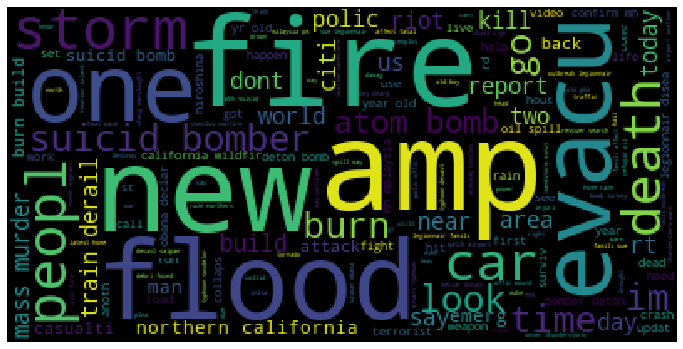

In [22]:
# Generate the word cloud for real disaster
plt.figure(figsize=(12,8))
word_cloud = WordCloud(
                          background_color='black',
                          max_font_size = 75
                         ).generate(" ".join(corpus_real))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

In [23]:
corpus_not=create_corpus_df(ds_train,0)
len(corpus_not)

corpus_not[:10]

['alway', 'tri', 'bring', 'heavi', 'metal', 'rt', 'cri', 'set', 'ablaz', 'plu']

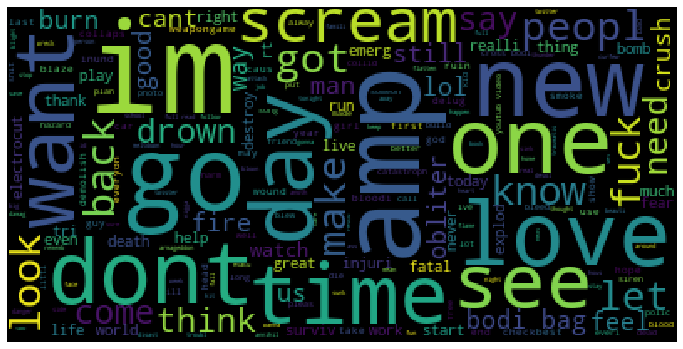

In [24]:
# Generate the word cloud for not real disaster
plt.figure(figsize=(12,8))
word_cloud = WordCloud(
                          background_color='black',
                          max_font_size = 75
                         ).generate(" ".join(corpus_not))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

In [25]:
corpus=[]
    
for i in range(ds_train['text'].shape[0]):
        corpus.append(ds_train['text'][i])

X=corpus
y=ds_train['target']

Xtest=ds_test['text']

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer=TfidfVectorizer(ngram_range=(1,3))
Xtrain_trans=vectorizer.fit_transform(X)
Xtest_trans=vectorizer.transform(Xtest)

In [27]:
import sklearn
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(Xtrain_trans,y,test_size=0.20, random_state=42)

In [28]:
from sklearn.tree import DecisionTreeClassifier
decisionTreeModel = DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = None, 
                                           splitter='best', 
                                           random_state=55)

clf = decisionTreeModel.fit(X_train,y_train)

In [29]:
clf.score(X_test,y_test)

0.7412309728656519

In [30]:
# Finding best parameters for our SVC model
#from sklearn.svm import SVC
#from sklearn.metrics import accuracy_score
#from sklearn.model_selection import KFold, GridSearchCV
#svc = SVC()
#param = {
#    'C': [0.1,1.2,1.3,1.4],
#    'kernel':['linear', 'rbf','poly','sigmoid'],
#    'gamma' :[0.1,0.8,0.9,1.2]
#}
#grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=3)
#grid_svc.fit(X_train, y_train)
#print(grid_svc.best_params_)
# Let's run our SVC again with the best parameters.
# which is {'C': 1.3, 'gamma': 0.8, 'kernel': 'sigmoid'}
from sklearn.svm import SVC
SVClassifier = SVC(kernel= 'sigmoid',
                   degree=3,
                   max_iter=10000,
                   C=1.3, 
                   gamma=0.8,
                   random_state = 55)

svc = SVClassifier.fit(X_train,y_train)

In [31]:
svc.score(X_test,y_test)

0.8067504963600265

In [32]:
#from sklearn.ensemble import RandomForestClassifier
#param= {"n_estimators": [ 500],
#    "criterion": ["gini", "entropy"],
#    "min_samples_leaf": [1, 10, 100],
#'max_depth': [16,20,24],
#        }

#reg = GridSearchCV(RandomForestClassifier(),param_grid=param,cv=3,scoring='accuracy')
#reg.fit(X_train, y_train)
#print('The best model is: ', reg.best_params_)
# Let's run our RandomForestClassifier again with the best parameters.
# which is {'criterion': 'gini', 'max_depth': 24, 'min_samples_leaf': 1, 'n_estimators': 500}
from sklearn.ensemble import RandomForestClassifier
ran=RandomForestClassifier(criterion= 'gini', max_depth=24, min_samples_leaf=1, n_estimators= 500)
ran.fit(X_train, y_train)
ran.score(X_test,y_test)

0.6690933156849769

In [33]:
#best_score = 0.0
#best_k = 0
#for k in range(1, 10):
#    KNeighborsModel = KNeighborsClassifier(n_neighbors = k,
#                                       weights = 'distance',
#                                     algorithm = 'brute')

#    KNeighborsModel.fit(X_train,y_train)
#    score=KNeighborsModel.score(X_test, y_test)
#    if score > best_score:
#        best_score = score
#        best_k = k
#print("best score is: ", best_score)
#print("best k is: ", best_k)
#print("KNeighbors Classifier model run successfully")
#KNeighborsModel.score(X_test, y_test)
from sklearn.neighbors import KNeighborsClassifier
KNeighborsModel = KNeighborsClassifier(n_neighbors = 2,
                                       weights = 'distance',
                                      algorithm = 'brute')

KNeighborsModel.fit(X_train,y_train)

print("KNeighbors Classifier model run successfully")
KNeighborsModel.score(X_test, y_test)

KNeighbors Classifier model run successfully


0.6909331568497684

In [34]:
prediction = svc.predict(Xtest_trans)
ds_test['target'] = prediction

         id keyword location  \
0         0     NaN      NaN   
1         2     NaN      NaN   
2         3     NaN      NaN   
3         9     NaN      NaN   
4        11     NaN      NaN   
...     ...     ...      ...   
3258  10861     NaN      NaN   
3259  10865     NaN      NaN   
3260  10868     NaN      NaN   
3261  10874     NaN      NaN   
3262  10875     NaN      NaN   

                                                   text  
0                            bbcmtd wholes market ablaz  
1                        alway tri bring heavi metal rt  
2      africanbaz break news nigeria flag set ablaz aba  
3                                         cri set ablaz  
4                    plu side look sky last night ablaz  
...                                                 ...  
3258  make sure evacu past fire door question ye wou...  
3259  fire alarm go zehr keep work minut decid evacu...  
3260  california amp monster amp fire contain told e...  
3261                cannon ball oce

In [35]:
ds_result = ds_test.drop(['keyword','location','text'], axis=1)
ds_result.to_csv('nlp-getting-started/prediction.csv', index=0)